# Introduction to [R] ggplot2

R's `ggplot2` module, written by Hadley Wickham is a graphics system that is based on the Grammar of Graphics.

Plotting your data with `ggplot2` can be as simple as a `plot(x,y)` command, or as complex as several lines of R commands. However, the result, even in the most basic theme is publication-ready.

I will cover a short introduction to the module, split into two parts. The first part will cover the `qplot` function, which is the quick-and-dirty way of plotting data with this module. The second part will cover the more low-level plotting configuration and I will try to glance over the various aspect of it.

One important thing to remember is that `ggplot2` **operates on data frames**. Therefore for the purpose of this notebook I will keep using the `mpg` dataset that is included in the module. Let's load it and see what it holds..


In [1]:
## if you don't have ggplot2 install execute: install.packages("ggplot2")

In [2]:
library(ggplot2)

In [3]:
str(mpg)

'data.frame':	234 obs. of  11 variables:
 $ manufacturer: Factor w/ 15 levels "audi","chevrolet",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ model       : Factor w/ 38 levels "4runner 4wd",..: 2 2 2 2 2 2 2 3 3 3 ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : Factor w/ 10 levels "auto(av)","auto(l3)",..: 4 9 10 1 4 9 1 9 4 10 ...
 $ drv         : Factor w/ 3 levels "4","f","r": 2 2 2 2 2 2 2 1 1 1 ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : Factor w/ 5 levels "c","d","e","p",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ class       : Factor w/ 7 levels "2seater","compact",..: 2 2 2 2 2 2 2 2 2 2 ...


-----------

## The `qplot()` function

The `qplot()` is the most basic function of the module. It works like the `plot()` function of the base graphics system. 

The plots in `ggplot2` are made of objects that belong in two categories:
- **aesthetics** $\rightarrow$ size, shape, color
- **geoms** $\rightarrow$ points, lines, bar-plots

As already mentioned, `ggplot2` works on data frames. In fact the `qplot()` function acts as a "graphical wrapper" around the data frame, extracting all the necessary information for the needs of plotting the dataset. This means that it has access to all numerical and categorical information within the dataset, as well as their labels. In fact, it will use the labels of the columns as axes titles in the final plot. Therefore, one important thing to keep in mind is **always have your factor variables labeled**.

Let's make our first plot!
Using the miles to the galon variable for the consumption of the car in the highway

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


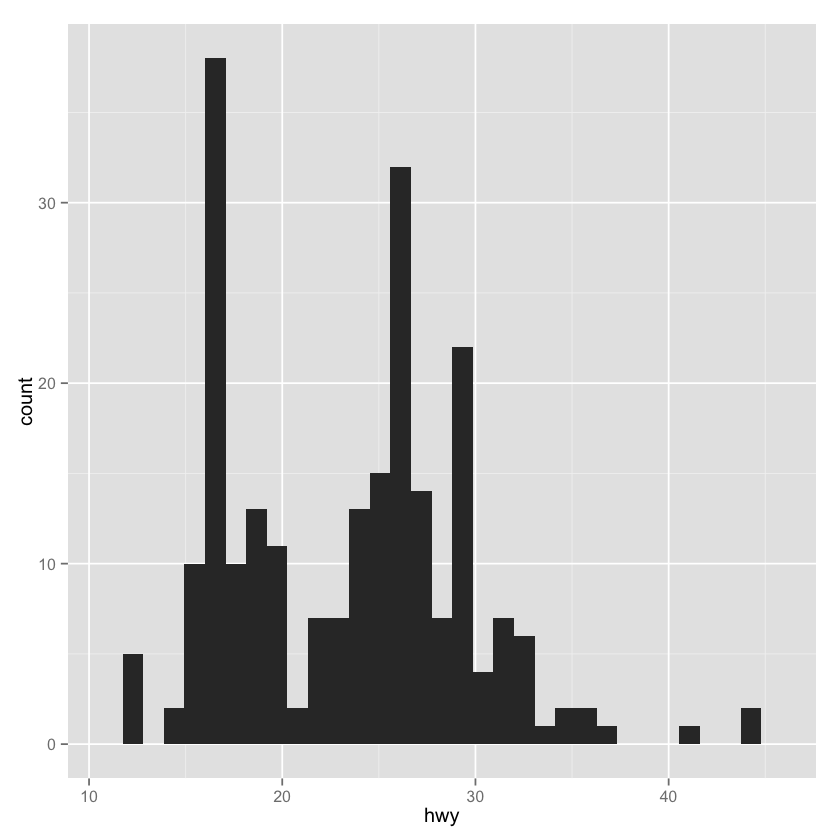

In [4]:
qplot(hwy, data=mpg)

Since only one variable was given to plot, the function chose to illustrate a histogram to best describe the input data.

In the function call: 
`qplot(hwy, data=mpg)`

the first argument is the name of the variable to be plotted in the dataset, while the second keyword argument is the name of the dataset from which to load the information.

Notice how the name of the variable was used to label the x-axis, while the fact that the histogram includes counts per bins is shown as the y-axis label. In addition, the width of the histogram is chosen automatically to describe all data points, while the default binning is $\frac{\mathrm{range}}{30}$.

Since the function identified that this is one variable and chose to plot it with a histogram, additional optimisation of the plot can be achieved with including additional arguments. For example, changing the default width of the bins:

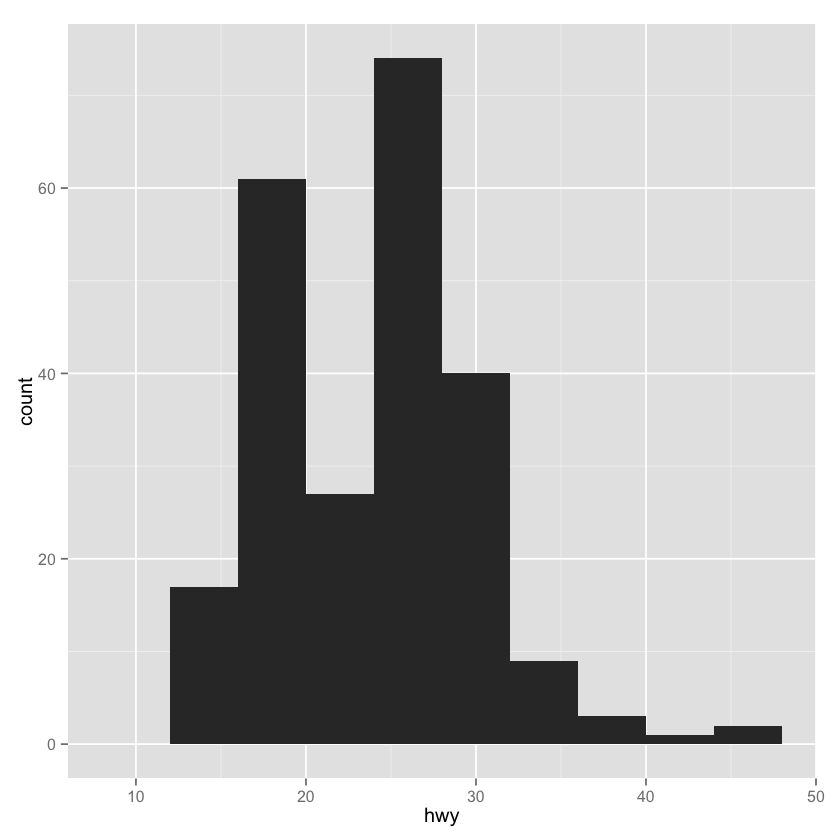

In [5]:
qplot(hwy, data=mpg, binwidth=4)

To create a two dimensional scatter plot for two variables of the dataframe one can simply do

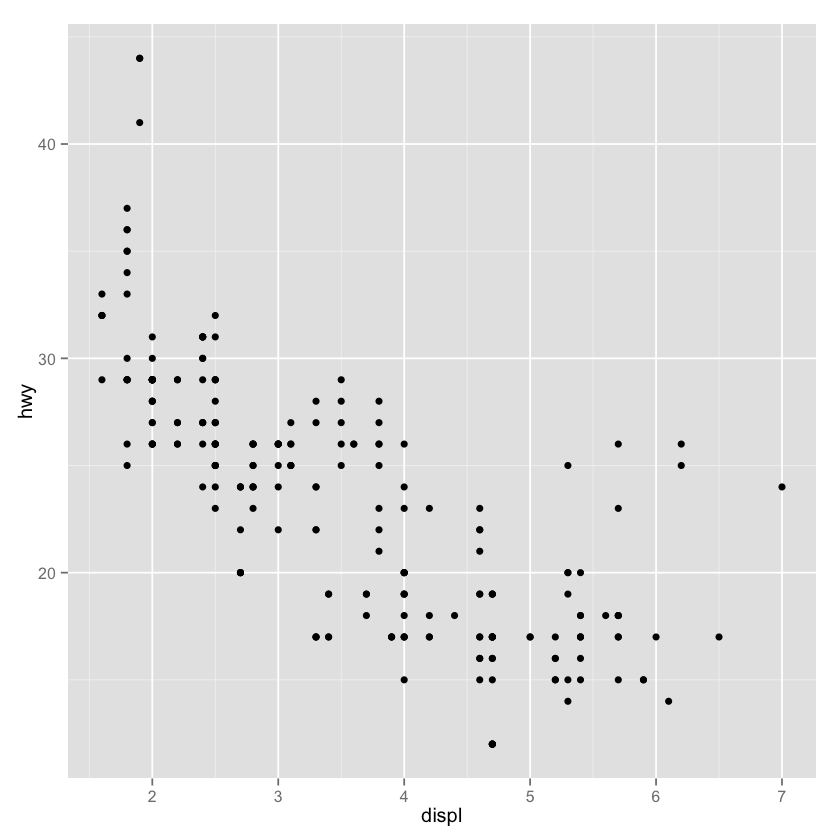

In [6]:
qplot(displ, hwy, data=mpg)

The order of the arguments correspond to x-axis, y-axis and dataset.

One additional level of information can be achieved by modifying the aesthetics. For example, one could add the information of the factor variable `drv` that shows if the vehicle is forward, rear of 4-wheel drive. To show such information on the same plot, one could use different colors to specify this categorical feature.

So projecting 3D information on a 2D plot by simply adding one more argument...

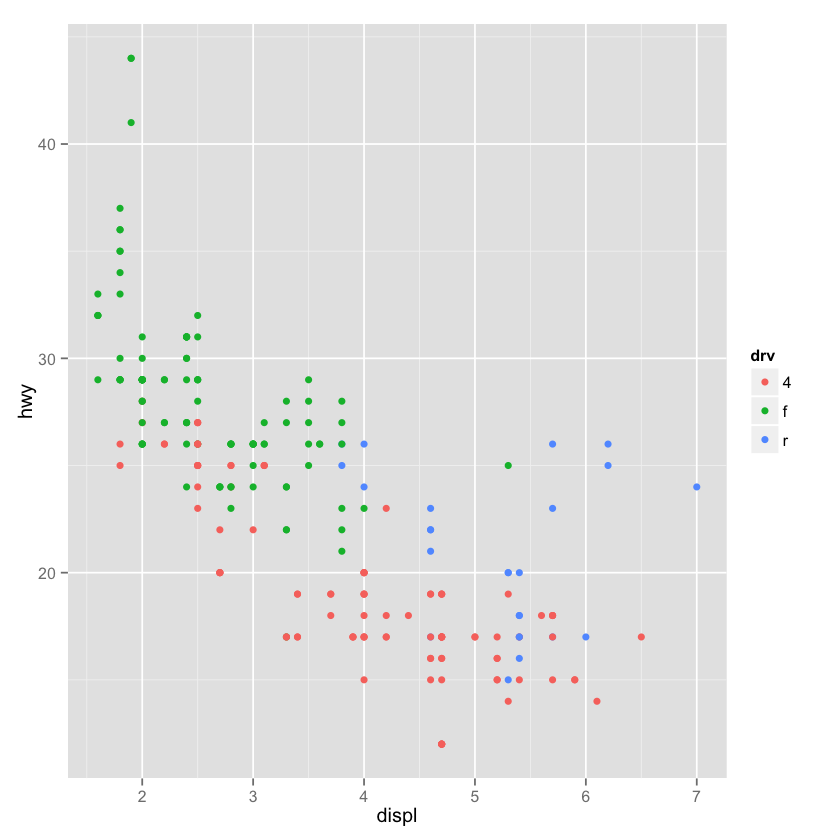

In [7]:
qplot(displ, hwy, data=mpg, color=drv)

Notice how the plot points are colorised to indicate different levels of the `drv` variable. Moreover, the legend for the coloring has been added automatically.

Assume now that we also add statistics to the plot. For example let's try to describe our data using a smooth curve to see the overall trends.

This can be done by adding **geoms**. In fact, in the previous example we had already invoked the call of a geom; the data points. The `qplot()` function and `ggplot2` in general when seeded only with the information of the variable and the dataset to which it belongs, they have no idea what to do with it. Thus, at that level, no plot has been created. What `qplot()` does, is to automatically invoke -for example- the geom("points") to plot the scatter plot of the two variables.

Let's add a geom, including a smooth line:


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


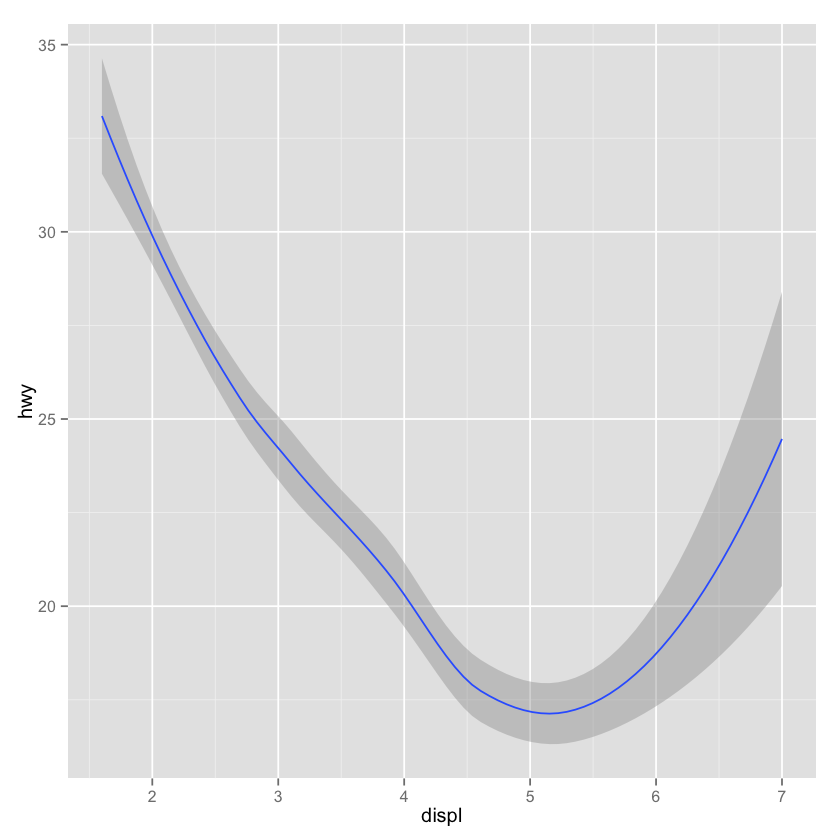

In [8]:
qplot(displ, hwy, data=mpg, geom="smooth")

This plots a smooth line that corresponds to the dataset, while the gray area defines the $95\%$ confidence interval around it. Notice that the points have dissapeared. This is due to the fact that by specifying the geom that the plot should use, the default configuration is overwritten. If I'd want to also include the points then I have to specify it explicitly.

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


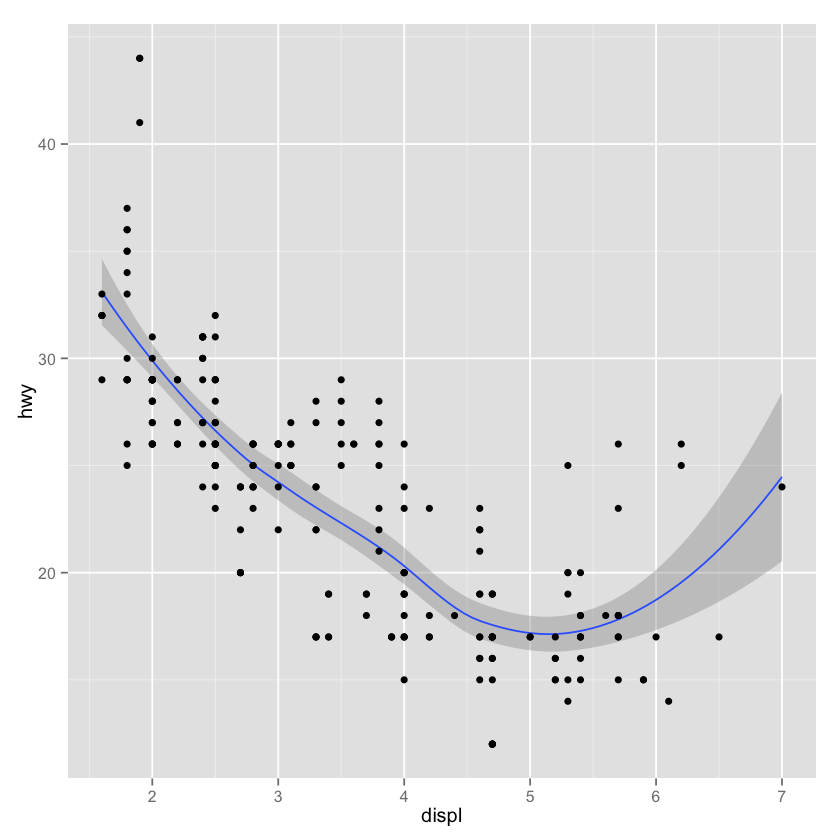

In [9]:
qplot(displ, hwy, data=mpg, geom=c("smooth","point"))

Finally, notice that I have removed the condition `color=drv`.
This is due to the fact that when such a categorisation is present, the geoms will be drawn for each category separately. For example..

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


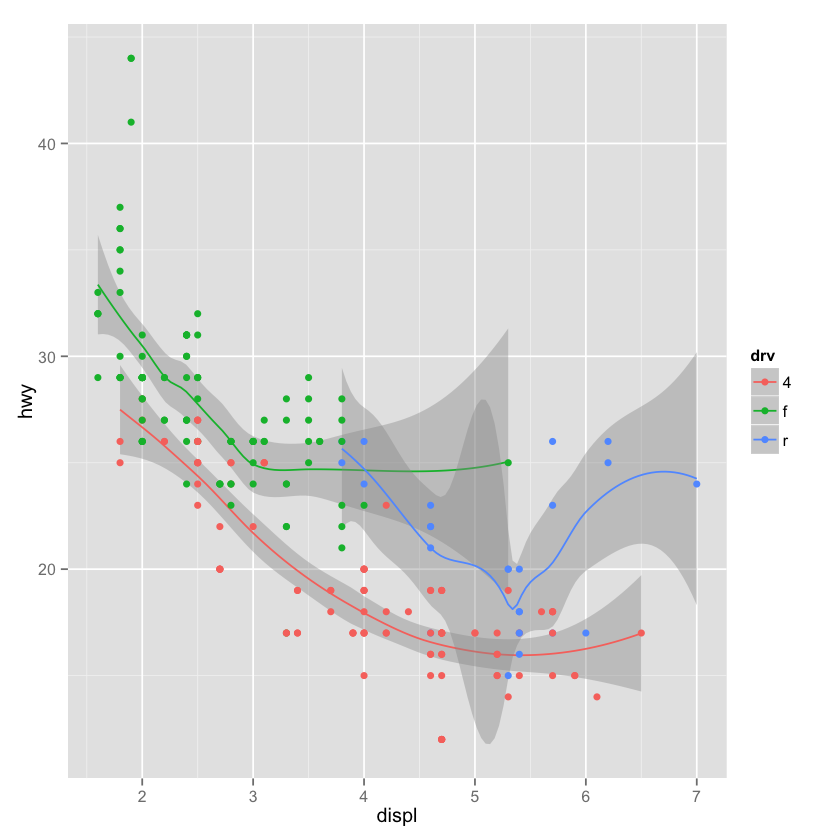

In [10]:
qplot(displ, hwy, data=mpg, color=drv ,geom=c("smooth","point"))

One additional way to visualise the separation of the data would be not to separate them by **color** but rather separate them by **shape**.

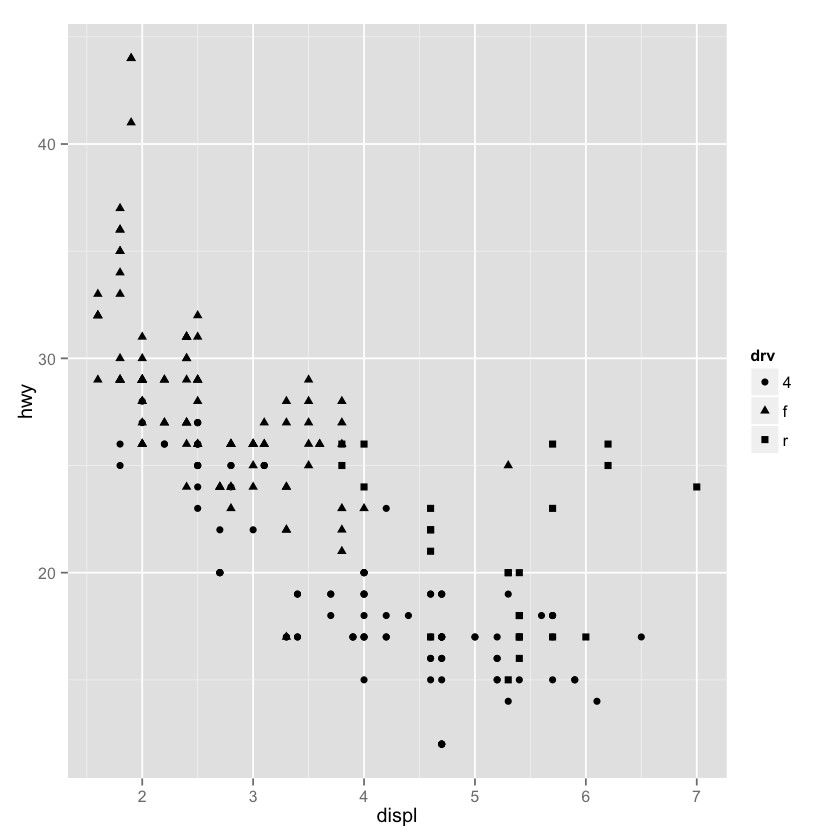

In [11]:
qplot(displ, hwy, data=mpg, shape=drv)

Where we used circles, triangles and squares as markers for the various categories.

Finally, one could use differnet statistical methods for the smoothing. For example if instead of the confidence level one wanted to use a linear model to identify the linear relation, one could specify

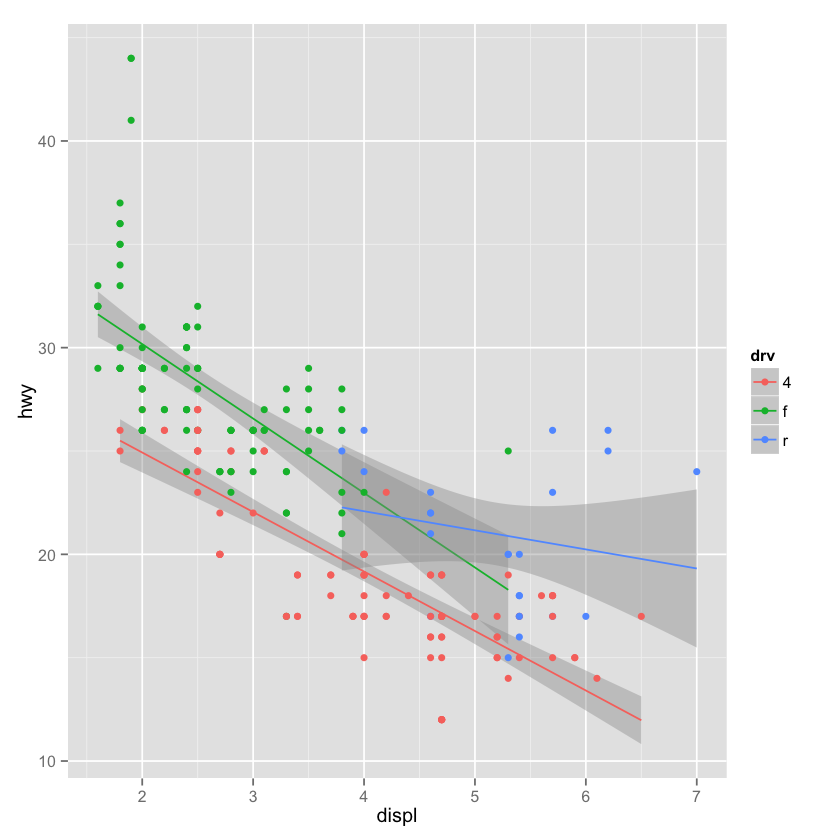

In [12]:
qplot(displ, hwy, data=mpg, color=drv, geom=c("smooth","point"), method=lm)

____

#### Facets

Another interesting feature of `ggplot2` is the introduction of **facets**. These are panel-like plots that separate the distribution of variables based on the level of one categorical variable. This is similar to what `color` and `fill` arguments had as a result in the plots we've seen up to now, with the difference that the different categories are not overlayed, but rather split into different plots.

Facets can be used as an argument in the `qplot()` function. They have a very distinct syntax:
- The facet can be split by rows or by columns or both;
- One variable is used to split the panel in rows and one to split it in columns;
- In the syntax of facets the two variables are defined in the arguments list and are separated by a `~` (tilde) symbol.
- If only one variable is to be used, then in the place of the non-used variable a `.` is placed, to keep the syntax `rows ~ columns`.

For example, to split the plots by the `drv` variable and organise them in one row with three columns:



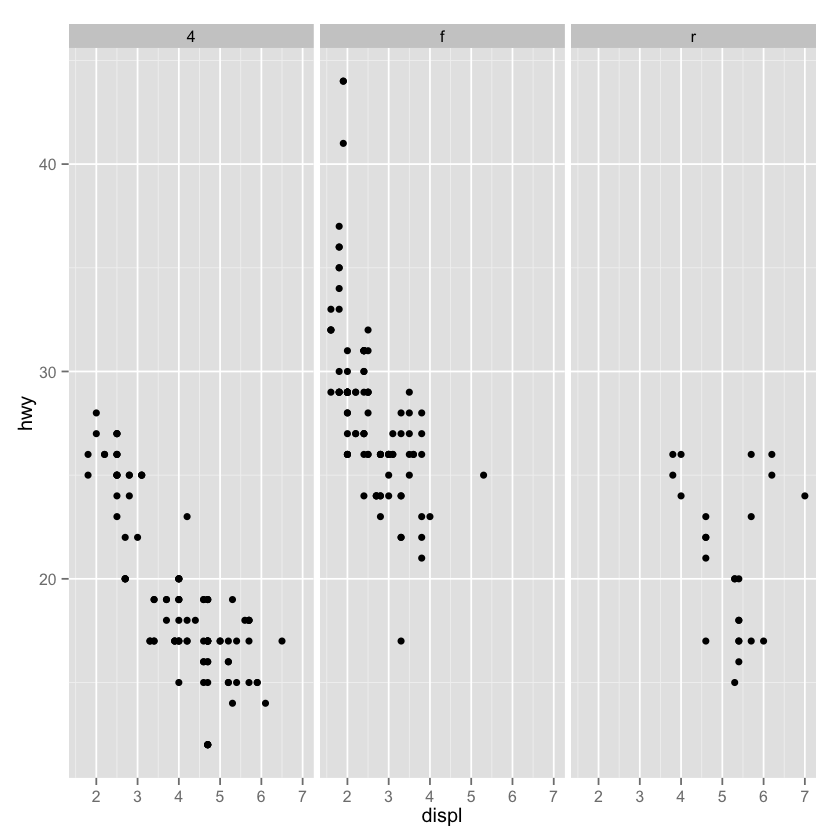

In [13]:
qplot(displ, hwy, data=mpg, facets = .~drv)

While to do the same thing but split them in rows in one column:

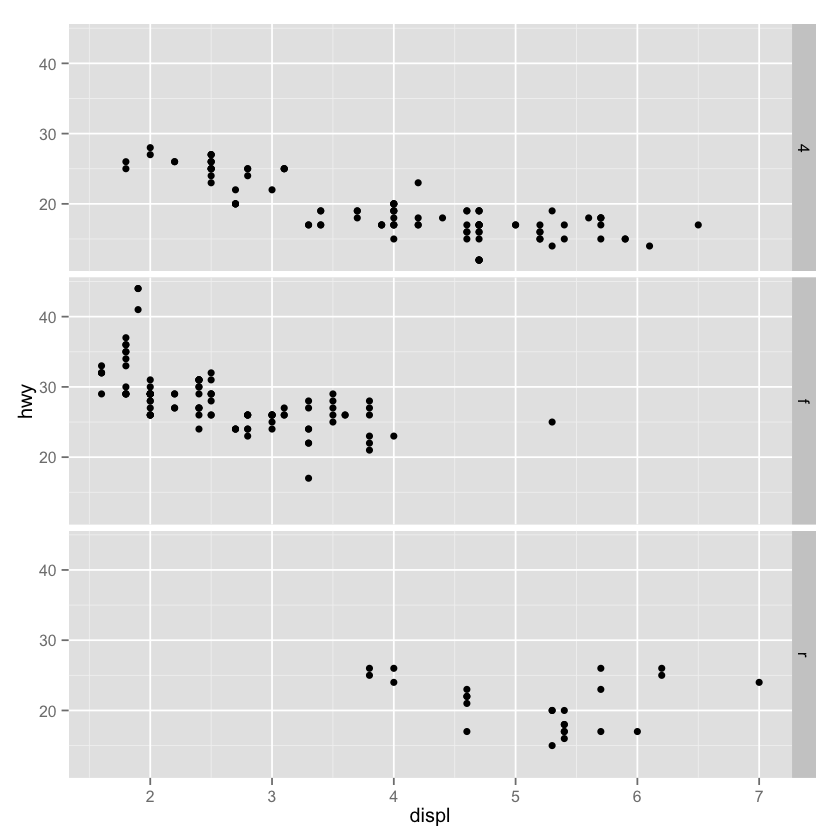

In [14]:
qplot(displ, hwy, data=mpg, facets = drv~.)

Again, the same logic applies on geoms.

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


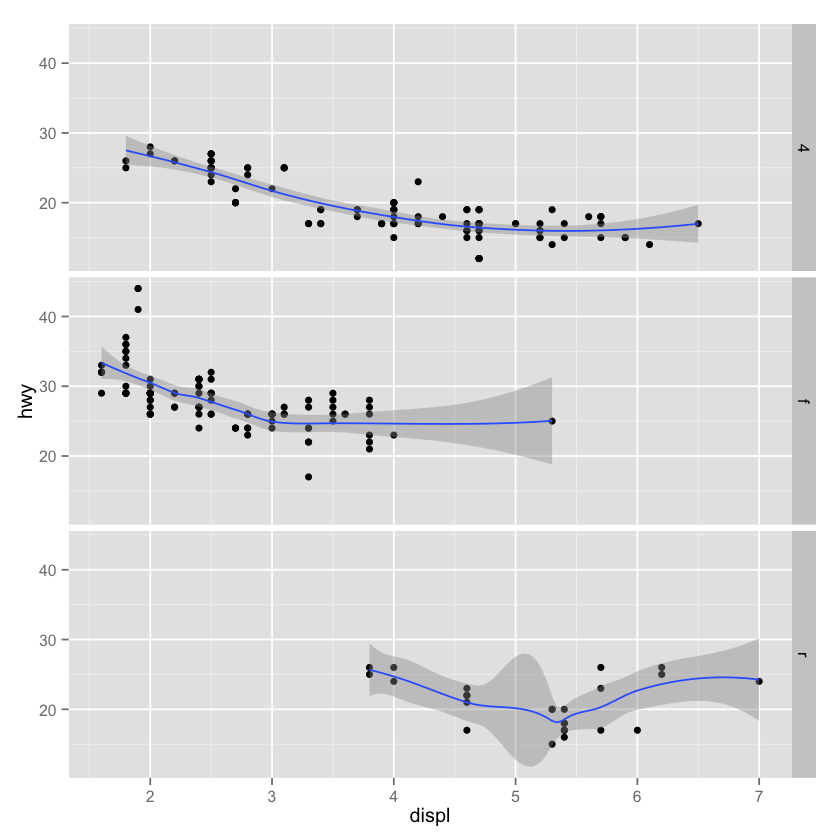

In [15]:
qplot(displ, hwy, data=mpg, facets = drv~., geom=c("point","smooth"))

By the way the same categorisation can be achieved in all types of plots, by properly setting their arguments. For example, in a histogram we don't have color, but rather "**fill** color". So if we try for one variable...

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


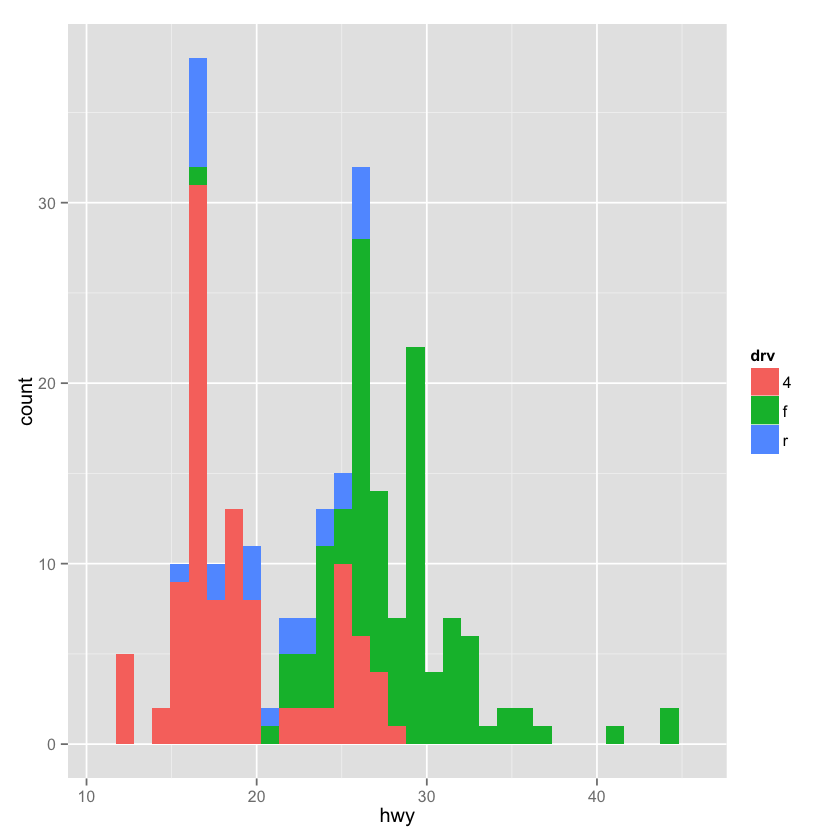

In [16]:
qplot(hwy, data=mpg, fill=drv)

`qplot()` will create a histogram for this variable which consists of three internal ones, each one corresponding to a different level of the `drv` variable and is filled automatically using different colours.

In histograms, one of the geoms that can be introduced is the "`density`" smooth.

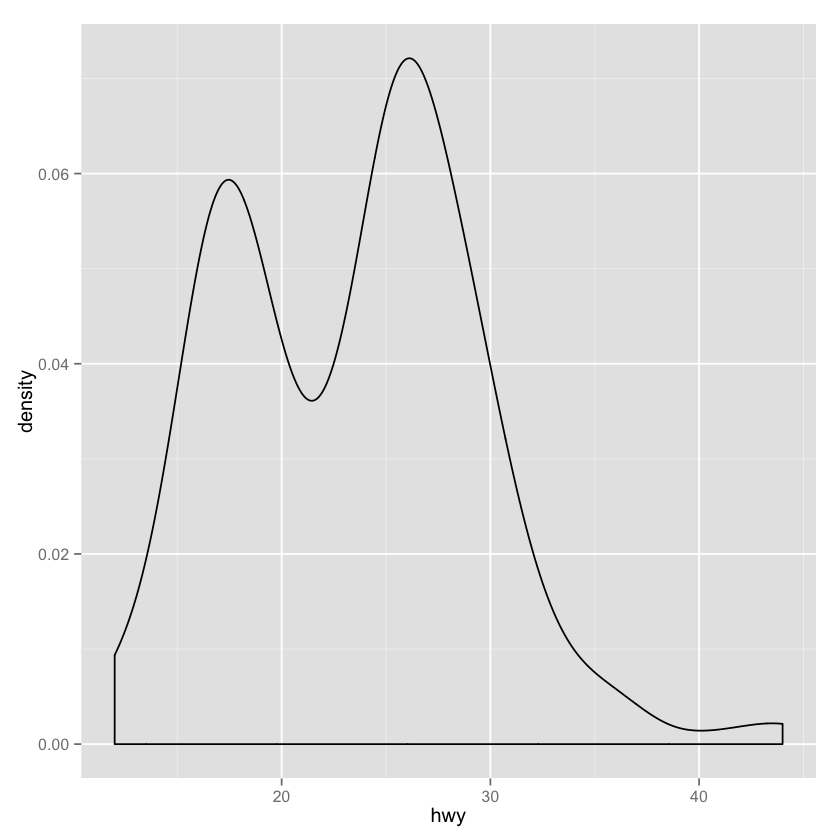

In [17]:
qplot(hwy, data=mpg, geom="density")

And to see where these two peaks come from we may want to categorise this density distribution based on the `drv` variable. Thus by categorise and visualise it by the line color:

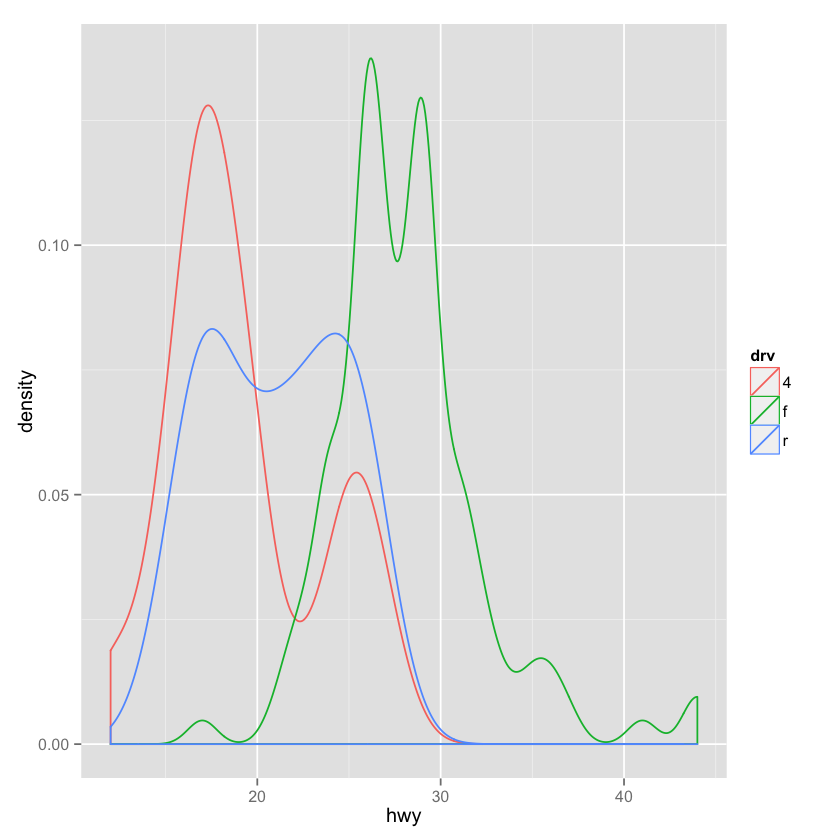

In [18]:
qplot(hwy, data=mpg, color=drv, geom="density")

or by the fill color

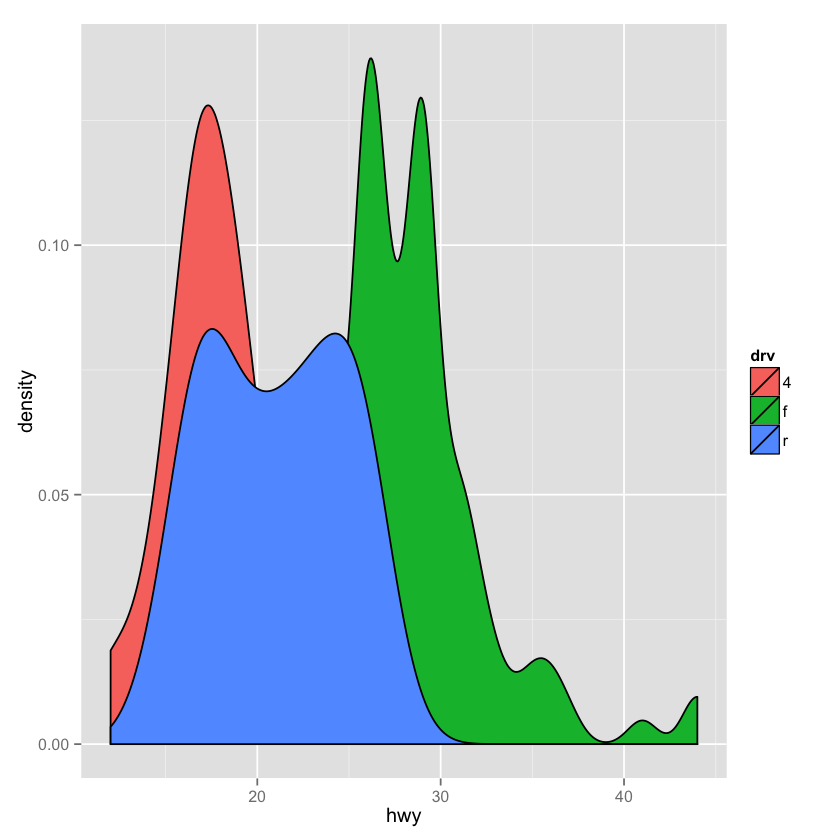

In [19]:
qplot(hwy, data=mpg, fill=drv, geom="density")

---

## The `ggplot()` object

While the `qplot()` function is quite handly, it hides the real power of `ggplot2`: the customisation level.
In this part, I want to cover the basic ideas of the package.

Contrary to the `qplot()` function, when using the full ggplot package, we should explicitly define 
- the aesthetics, ie how data are mapped to color, size, etc
- the geoms, ie th egeometric objects (points, lines, shapes)
- the facets
- the stats, ie statistical transformations (binning, quantiles, smoothing)
- the scales, ie what scale an aesthetic map uses (e.g. male=red, female=blue)
- the coordinate system to which the information is transformed.

Using the package, the plots are made in steps (layers):
1. Define the data to be plotted (always a dataframe is needed)
2. Plot the data
3. Overlay a summary (smoothing, fits, facets, etc)
4. Add meta-data and annotation (labels, legends, etc)

So let's generate a basic plot using `ggplot`

### 1. Define the data to be plotted

In [20]:
g <- ggplot(mpg, aes(displ, hwy))

So we generate a `ggplot` object that loads the `mpg` dataset and uses as aesthetics (`aes()`) the `displ` and the `hwy` variables.

*We have the plot object in memory, but we made no actual plot yet, since we have not defined the geometry!*

This is easily seen by printing out the g object:

In [21]:
summary(g)

data: manufacturer, model, displ, year, cyl, trans, drv, cty, hwy, fl,
  class [234x11]
mapping:  x = displ, y = hwy
faceting: facet_null() 


In [22]:
g

ERROR: Error: No layers in plot


So indeed no plot is created yet since it has no layers.

### 2. Plot the data

If we now add on top a geom : 

In [23]:
p <- g + geom_point()

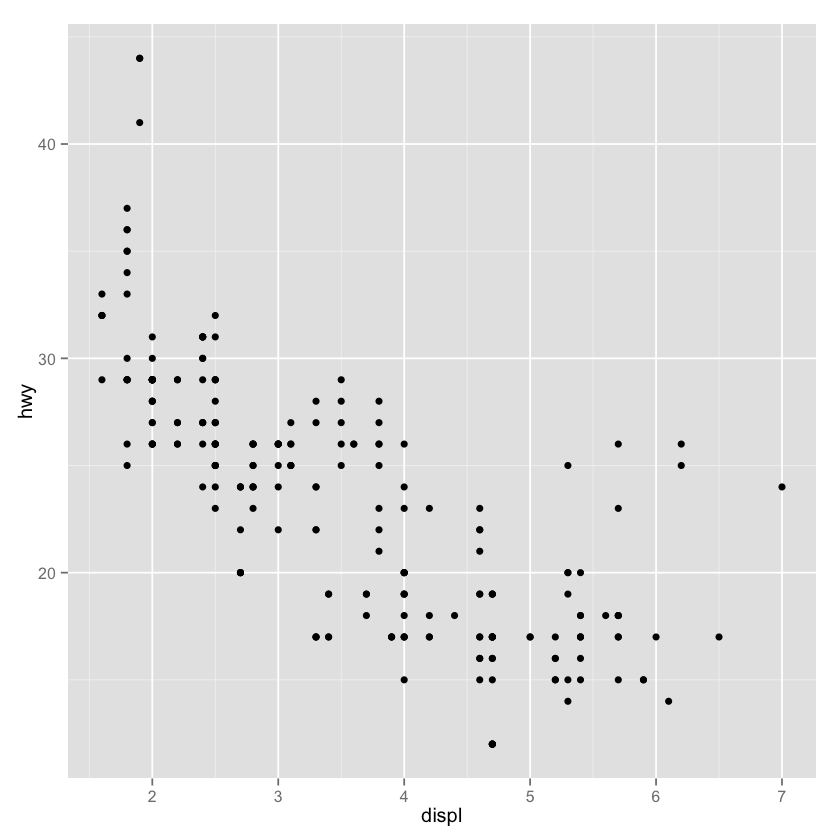

In [24]:
p

The `geom_point()` needs no argumens in this case since all the information is held in the `g` object, on top of which the `geom_point()` is added.

### 3. Overlay a summary

Adding on top a smooth line...

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


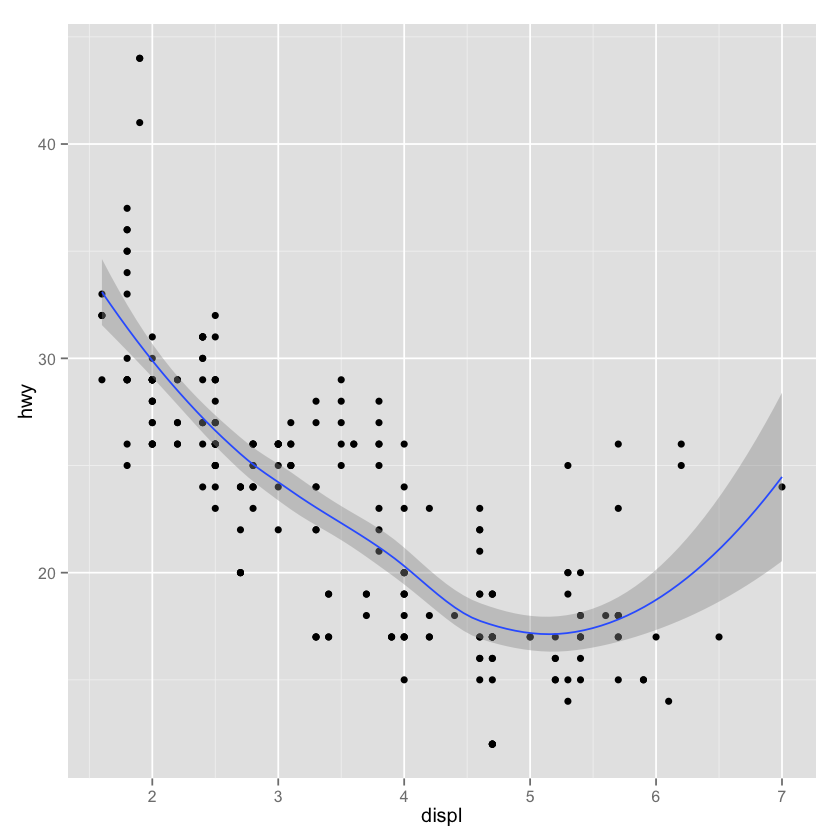

In [40]:
g + geom_point() + geom_smooth()  # default smoother is lo(w)ess (LOcally (WEighted) Scatter plot Smoothing)

... or for a specific smoothing method 

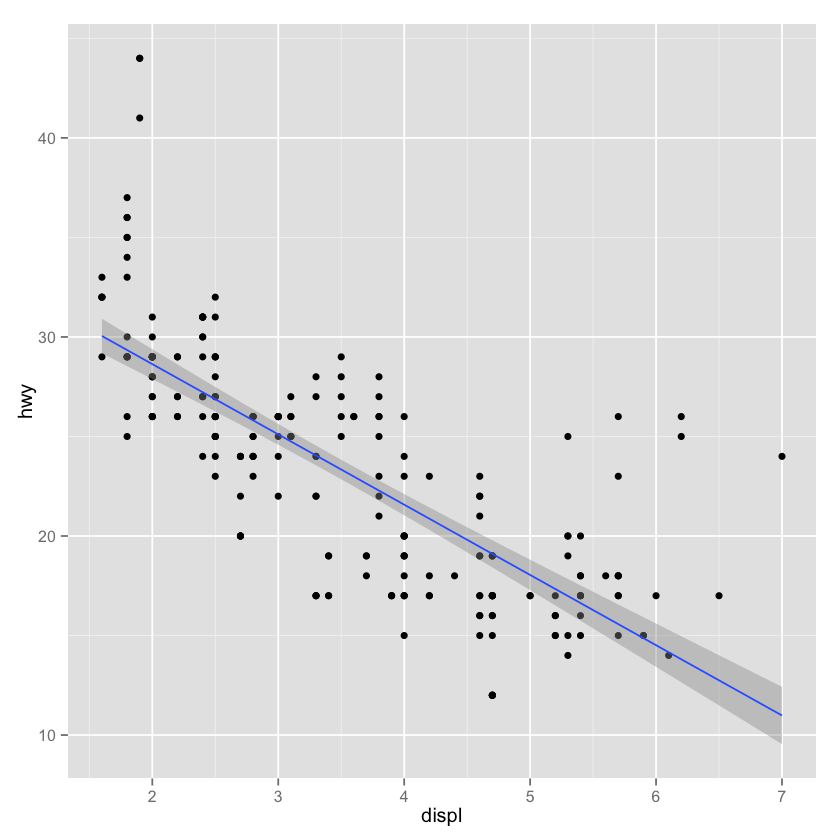

In [25]:
g + geom_point() + geom_smooth(method="lm")

and to reproduce the final plot as when using `qplot()` I should also include the facets. In the syntax of `ggplot` *just add one more layer*..

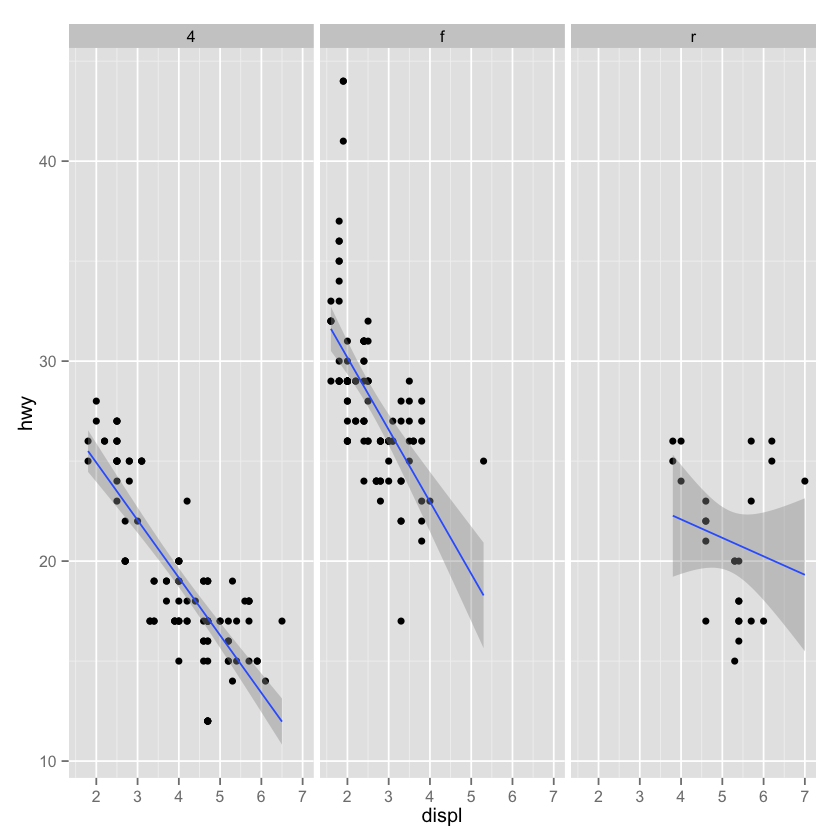

In [26]:
g + geom_point() + geom_smooth(method="lm") + facet_grid(.~drv)

---

### Annotations

So after the plot has been made, I want to add titles and axes labels

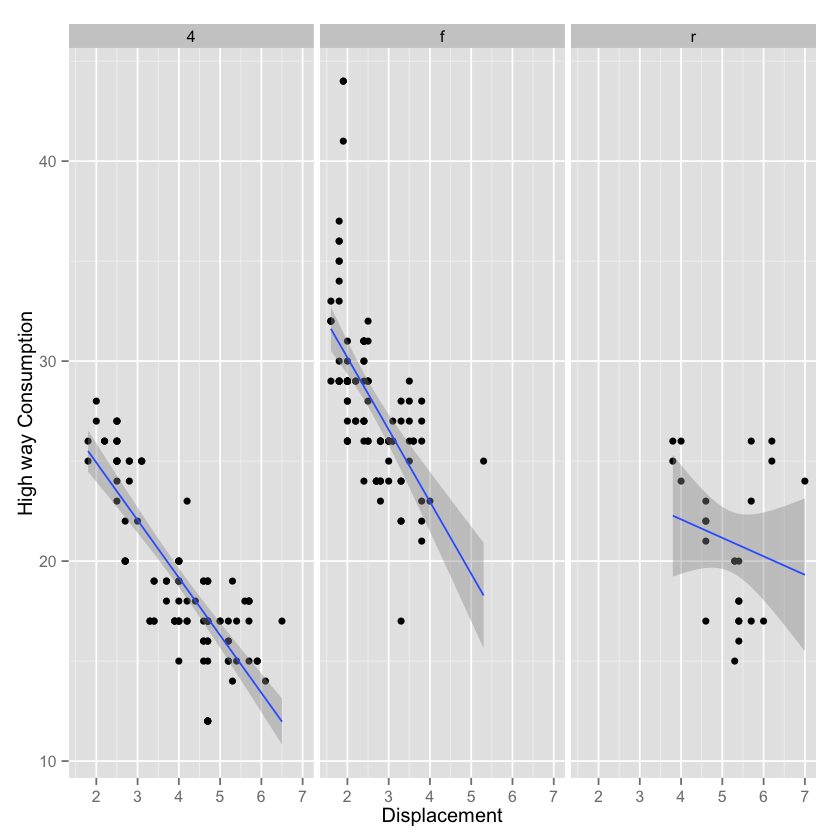

In [28]:
g + geom_point() + geom_smooth(method="lm") + facet_grid(.~drv) + xlab("Displacement") + ylab("High way Consumption")

Or change the cheme completely

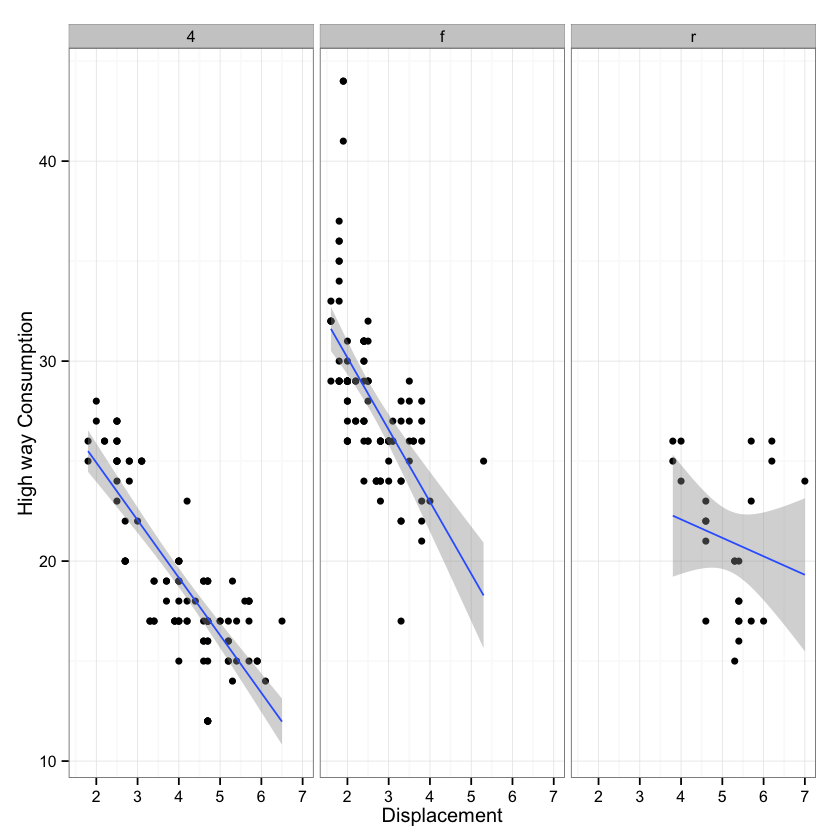

In [33]:
g + geom_point() + geom_smooth(method="lm")  + 
facet_grid(.~drv) + xlab("Displacement") + ylab("High way Consumption") +
theme_bw()

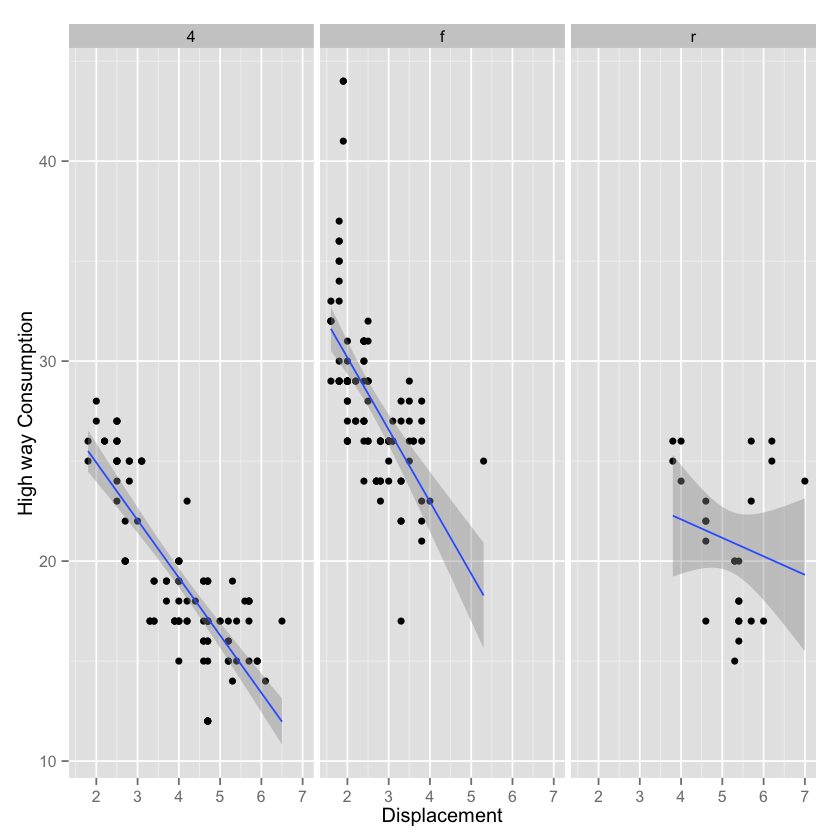

In [35]:
g + geom_point() + geom_smooth(method="lm")  + 
facet_grid(.~drv) + xlab("Displacement") + ylab("High way Consumption") +
theme_gray()